In [ ]:
# OUtline at https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266
# https://www.kaggle.com/mnassrib/customer-churn-prediction-telecom-churn-dataset

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from pylab import rcParams


%matplotlib inline

In [2]:
data = pd.read_csv('only_month_to_month.csv')

In [3]:
data.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),$56.05,...,False,False,True,3.0,20211026,$0.00,False,2 Year,No Phone Service,DSL
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,$20.00,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,One Line,No Internet Service
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),$61.90,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,Two or More Lines,DSL
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,$19.70,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,1 Year,One Line,No Internet Service
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,$20.25,...,NaN,NaN,NaN,NaN,20211026,$0.00,False,2 Year,One Line,No Internet Service


In [4]:
data.shape

(7043, 30)

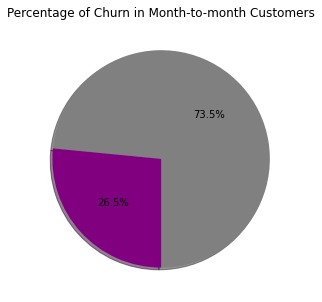

In [5]:
# Current churn rate
sizes = data['churn'].value_counts(sort = True)
colors = ['grey', 'purple']
rcParams['figure.figsize']=5,5

plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percentage of Churn in Month-to-month Customers')
plt.show();

In [6]:
#Remove data irrelevant to correlation
data.drop('customer_id', axis=1, inplace=True)

In [7]:
#Clean data, define proper dtypes
data.dtypes


gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                 object
total_charges                   object
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges         object
validate_monthly_charges 

In [8]:
# Convert types
data['monthly_charges']=data['monthly_charges'].str.replace('$','')
data['monthly_charges']=data['monthly_charges'].str.replace(',','').astype(float)
data['total_charges']=data['total_charges'].str.replace('$','')
data['total_charges']=data['total_charges'].str.replace(',','').astype(float)
data['average_monthly_charges']=data['average_monthly_charges'].str.replace('$','')
data['average_monthly_charges']=data['average_monthly_charges'].str.replace(',','').astype(float)




In [9]:
data.dtypes

gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                float64
total_charges                  float64
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges        float64
validate_monthly_charges 

In [10]:
data.contract_type_desc.head(50)

0             2 Year
1             2 Year
2             2 Year
3             1 Year
4             2 Year
5             2 Year
6             2 Year
7             2 Year
8             2 Year
9             2 Year
10            2 Year
11            1 Year
12    Month-to-Month
13    Month-to-Month
14    Month-to-Month
15    Month-to-Month
16    Month-to-Month
17            2 Year
18            2 Year
19    Month-to-Month
20            2 Year
21            2 Year
22            2 Year
23    Month-to-Month
24            2 Year
25            2 Year
26            2 Year
27            1 Year
28    Month-to-Month
29            1 Year
30    Month-to-Month
31            1 Year
32    Month-to-Month
33    Month-to-Month
34    Month-to-Month
35    Month-to-Month
36    Month-to-Month
37            1 Year
38            2 Year
39            1 Year
40            2 Year
41            1 Year
42            1 Year
43            1 Year
44            1 Year
45            2 Year
46            2 Year
47    Month-t

In [11]:
#filter only month to month
data =data[data.contract_type_desc=='Month-to-Month']

In [12]:
data.sample(20)

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
6255,Female,0,Yes,No,1,1,0,Mailed check,71.05,1837.70,...,NaN,NaN,NaN,NaN,20190831,71.05,True,Month-to-Month,One Line,DSL
6817,Male,1,Yes,No,2,2,0,Electronic check,88.20,4159.45,...,NaN,NaN,NaN,NaN,20171121,88.20,True,Month-to-Month,Two or More Lines,Fiber Optic
2637,Male,0,No,No,2,2,0,Electronic check,82.35,1852.85,...,NaN,NaN,NaN,NaN,20191211,82.35,True,Month-to-Month,Two or More Lines,Fiber Optic
828,Male,0,No,No,1,0,0,Bank transfer (automatic),19.65,19.65,...,NaN,NaN,NaN,NaN,20210925,19.65,True,Month-to-Month,One Line,No Internet Service
3519,Male,0,No,No,0,1,0,Credit card (automatic),25.10,382.80,...,NaN,NaN,NaN,NaN,20200719,25.10,True,Month-to-Month,No Phone Service,DSL
5757,Female,1,No,No,2,2,0,Electronic check,95.45,396.10,...,NaN,NaN,NaN,NaN,20210621,95.45,True,Month-to-Month,Two or More Lines,Fiber Optic
5269,Male,0,No,No,1,2,0,Bank transfer (automatic),95.90,827.45,...,NaN,NaN,NaN,NaN,20210205,95.90,True,Month-to-Month,One Line,Fiber Optic
452,Male,1,No,No,1,2,0,Electronic check,70.65,293.85,...,NaN,NaN,NaN,NaN,20210621,70.65,True,Month-to-Month,One Line,Fiber Optic
2143,Male,1,No,No,2,2,0,Electronic check,88.80,88.80,...,NaN,NaN,NaN,NaN,20210925,88.80,True,Month-to-Month,Two or More Lines,Fiber Optic
6485,Male,0,Yes,No,2,2,0,Electronic check,85.15,1139.20,...,NaN,NaN,NaN,NaN,20200914,85.15,True,Month-to-Month,Two or More Lines,Fiber Optic


In [13]:
data.shape

(3875, 29)

In [14]:
data.dtypes

gender                          object
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                float64
total_charges                  float64
churn                           object
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges        float64
validate_monthly_charges 

In [15]:
data.churn.head()

12     No
13    Yes
14    Yes
15    Yes
16     No
Name: churn, dtype: object

In [16]:
data.churn=data.churn.str.replace('No','0')
data.churn=data.churn.str.replace('Yes','1')

In [17]:
data.churn.head()

12    0
13    1
14    1
15    1
16    0
Name: churn, dtype: object

In [18]:
data.churn=data.churn.astype(int)

In [19]:
data.churn.head()

12    0
13    1
14    1
15    1
16    0
Name: churn, dtype: int64

In [20]:
# Split data into training and testing set (i know I should do 3 for validation, but at this early exploration phase, I am not)

y = data["churn"].values
X = data.drop(labels = ["churn"],axis = 1)


In [21]:
#do 0 / 1 conversion on sex
data.rename(columns={'gender': 'is_male'}, inplace = True)
data.head()

,is_male,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
12,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,...,NaN,NaN,NaN,NaN,20210123,59.9,True,Month-to-Month,Two or More Lines,DSL
13,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,...,NaN,NaN,NaN,NaN,20210702,73.9,True,Month-to-Month,One Line,Fiber Optic
14,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,...,NaN,NaN,NaN,NaN,20201006,98.0,True,Month-to-Month,One Line,Fiber Optic
15,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,...,NaN,NaN,NaN,NaN,20210721,83.9,True,Month-to-Month,One Line,Fiber Optic
16,Female,0,No,Yes,1,1,0,Credit card (automatic),69.4,571.45,...,NaN,NaN,NaN,NaN,20210217,69.4,True,Month-to-Month,One Line,DSL


In [22]:
data.is_male=data.is_male.str.replace('Male','1')
data.is_male=data.is_male.str.replace('Female','0')
data.is_male=data.is_male.astype(bool)

In [23]:
data.head()

,is_male,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
12,True,0,No,No,2,1,0,Mailed check,59.9,542.40,...,NaN,NaN,NaN,NaN,20210123,59.9,True,Month-to-Month,Two or More Lines,DSL
13,True,0,No,No,1,2,0,Electronic check,73.9,280.85,...,NaN,NaN,NaN,NaN,20210702,73.9,True,Month-to-Month,One Line,Fiber Optic
14,True,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,...,NaN,NaN,NaN,NaN,20201006,98.0,True,Month-to-Month,One Line,Fiber Optic
15,True,1,Yes,No,1,2,0,Mailed check,83.9,267.40,...,NaN,NaN,NaN,NaN,20210721,83.9,True,Month-to-Month,One Line,Fiber Optic
16,True,0,No,Yes,1,1,0,Credit card (automatic),69.4,571.45,...,NaN,NaN,NaN,NaN,20210217,69.4,True,Month-to-Month,One Line,DSL


In [24]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
X_train.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,Unnamed: 23,start_date,average_monthly_charges
count,3100.00000,3100.000000,3100.000000,3100.0,3100.000000,3100.000000,3100.000000,3100.000000,0.0,3.100000e+03,3100.000000
mean,0.21129,1.283226,1.414194,0.0,66.449048,1388.032887,18.232903,0.758065,NaN,2.019838e+07,66.449048
std,0.40829,0.631876,0.716328,0.0,26.990510,1637.967284,17.983337,1.087129,NaN,1.484411e+04,26.990510
min,0.00000,0.000000,0.000000,0.0,18.750000,18.850000,1.000000,0.000000,NaN,2.015103e+07,18.750000
25%,0.00000,1.000000,1.000000,0.0,45.900000,161.075000,3.000000,0.000000,NaN,2.019061e+07,45.900000
50%,0.00000,1.000000,2.000000,0.0,73.550000,679.675000,12.000000,0.000000,NaN,2.020103e+07,73.550000
75%,0.00000,2.000000,2.000000,0.0,88.962500,2088.150000,29.000000,1.000000,NaN,2.021072e+07,88.962500
max,1.00000,2.000000,2.000000,0.0,117.450000,8061.500000,72.000000,3.000000,NaN,2.021092e+07,117.450000


In [26]:
X_test.describe()

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,Unnamed: 23,start_date,average_monthly_charges
count,775.000000,775.000000,775.000000,775.0,775.000000,775.000000,775.000000,775.000000,0.0,7.750000e+02,775.000000
mean,0.196129,1.294194,1.412903,0.0,66.196258,1294.141355,17.174194,0.784516,NaN,2.019935e+07,66.196258
std,0.397324,0.627661,0.716969,0.0,26.685771,1512.375569,16.523395,1.103796,NaN,1.355509e+04,26.685771
min,0.000000,0.000000,0.000000,0.0,19.200000,19.200000,1.000000,0.000000,NaN,2.015111e+07,19.200000
25%,0.000000,1.000000,1.000000,0.0,45.525000,157.200000,3.000000,0.000000,NaN,2.019081e+07,45.525000
50%,0.000000,1.000000,2.000000,0.0,71.350000,679.550000,12.000000,0.000000,NaN,2.020111e+07,71.350000
75%,0.000000,2.000000,2.000000,0.0,88.175000,1921.800000,27.000000,1.000000,NaN,2.021072e+07,88.175000
max,1.000000,2.000000,2.000000,0.0,116.500000,7320.900000,72.000000,3.000000,NaN,2.021092e+07,116.500000


In [27]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [28]:
y_test

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

In [29]:
data.dtypes


is_male                           bool
is_senior_citizen                int64
partner                         object
dependents                      object
phone_service                    int64
internet_service                 int64
contract_type                    int64
payment_type                    object
monthly_charges                float64
total_charges                  float64
churn                            int64
tenure                           int64
is_female                         bool
has_churned                       bool
has_phone                         bool
has_internet                      bool
has_phone_and_internet            bool
partner_dependents               int64
no_partners_no_dependents       object
no_dependents_yes_partners      object
dependents_no_partners          object
yes_dependents_and_partners     object
Unnamed: 23                    float64
start_date                       int64
average_monthly_charges        float64
validate_monthly_charges 

In [30]:
data[data.eq("Male").any(1)]


,is_male,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc


In [31]:
X_train[X_train.eq("Male").any(1)]

,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
5263,Male,0,No,No,1,2,0,Mailed check,79.85,887.35,...,NaN,NaN,NaN,NaN,20201121,79.85,True,Month-to-Month,One Line,Fiber Optic
5500,Male,0,Yes,Yes,1,1,0,Electronic check,51.05,415.05,...,NaN,NaN,NaN,NaN,20210220,51.05,True,Month-to-Month,One Line,DSL
5989,Male,0,No,Yes,2,1,0,Electronic check,50.05,50.05,...,NaN,NaN,NaN,NaN,20210925,50.05,True,Month-to-Month,Two or More Lines,DSL
4129,Male,0,No,No,1,2,0,Credit card (automatic),74.55,1170.50,...,NaN,NaN,NaN,NaN,20200705,74.55,True,Month-to-Month,One Line,Fiber Optic
5129,Male,0,Yes,Yes,1,1,0,Credit card (automatic),70.30,1706.45,...,NaN,NaN,NaN,NaN,20191018,70.30,True,Month-to-Month,One Line,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,Male,0,No,No,0,1,0,Credit card (automatic),30.50,208.70,...,NaN,NaN,NaN,NaN,20210331,30.50,True,Month-to-Month,No Phone Service,DSL
6286,Male,0,No,No,2,0,0,Mailed check,25.00,25.00,...,NaN,NaN,NaN,NaN,20210925,25.00,True,Month-to-Month,Two or More Lines,No Internet Service
145,Male,0,No,No,1,2,0,Electronic check,84.30,235.05,...,NaN,NaN,NaN,NaN,20210802,84.30,True,Month-to-Month,One Line,Fiber Optic
2870,Male,0,No,No,1,0,0,Mailed check,20.25,178.50,...,NaN,NaN,NaN,NaN,20210130,20.25,True,Month-to-Month,One Line,No Internet Service


In [32]:
X_train.rename(columns={'gender': 'is_male'}, inplace = True)

X_train.is_male=X_train.is_male.str.replace('Male','1')
X_train.is_male=X_train.is_male.str.replace('Female','0')
X_train.is_male=X_train.is_male.astype(bool)

In [33]:
X_train[X_train.eq("Male").any(1)]

,is_male,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc


In [34]:
X_train.head()

,is_male,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,...,no_dependents_yes_partners,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc
5263,True,0,No,No,1,2,0,Mailed check,79.85,887.35,...,NaN,NaN,NaN,NaN,20201121,79.85,True,Month-to-Month,One Line,Fiber Optic
3749,True,1,No,No,2,2,0,Electronic check,85.55,187.45,...,NaN,NaN,NaN,NaN,20210820,85.55,True,Month-to-Month,Two or More Lines,Fiber Optic
4003,True,1,Yes,No,2,2,0,Electronic check,105.90,6401.25,...,NaN,NaN,NaN,NaN,20161013,105.90,True,Month-to-Month,Two or More Lines,Fiber Optic
5500,True,0,Yes,Yes,1,1,0,Electronic check,51.05,415.05,...,NaN,NaN,NaN,NaN,20210220,51.05,True,Month-to-Month,One Line,DSL
5989,True,0,No,Yes,2,1,0,Electronic check,50.05,50.05,...,NaN,NaN,NaN,NaN,20210925,50.05,True,Month-to-Month,Two or More Lines,DSL


In [35]:
X_train.partner=X_train.partner.str.replace('No','0')
X_train.partner=X_train.partner.str.replace('Yes','1')
X_train.partner=X_train.partner.astype(bool)

X_train.dependents=X_train.dependents.str.replace('No','0')
X_train.dependents=X_train.dependents.str.replace('Yes','1')
X_train.dependents=X_train.dependents.astype(bool)

In [ ]:
#Import linear regression model sci-kit learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [44]:
trace = go.Pie(labels = data["churn"].value_counts().keys().tolist(),
               values = data["churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data2 = [trace]
fig = go.Figure(data = data2, layout = layout)
py.iplot(fig)

In [38]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(data.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [39]:
dataoveriew(data,'Overview of entire set')

Overview of entire set:

Rows: 3875

Number of features: 29

Features:
['is_male', 'is_senior_citizen', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract_type', 'payment_type', 'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female', 'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet', 'partner_dependents', 'no_partners_no_dependents', 'no_dependents_yes_partners', 'dependents_no_partners', 'yes_dependents_and_partners', 'Unnamed: 23', 'start_date', 'average_monthly_charges', 'validate_monthly_charges', 'contract_type_desc', 'phone_type_desc', 'internet_type_desc']

Missing values: 19375

Unique values:
is_male                           1
is_senior_citizen                 2
partner                           2
dependents                        2
phone_service                     3
internet_service                  3
contract_type                     1
payment_type                      4
monthly_charges                1238
total_charges  

In [40]:
dataoveriew(X_train,'Overview of training set')

Overview of training set:

Rows: 3100

Number of features: 28

Features:
['is_male', 'is_senior_citizen', 'partner', 'dependents', 'phone_service', 'internet_service', 'contract_type', 'payment_type', 'monthly_charges', 'total_charges', 'churn', 'tenure', 'is_female', 'has_churned', 'has_phone', 'has_internet', 'has_phone_and_internet', 'partner_dependents', 'no_partners_no_dependents', 'no_dependents_yes_partners', 'dependents_no_partners', 'yes_dependents_and_partners', 'Unnamed: 23', 'start_date', 'average_monthly_charges', 'validate_monthly_charges', 'contract_type_desc', 'phone_type_desc', 'internet_type_desc']

Missing values: 15500

Unique values:
is_male                           1
is_senior_citizen                 2
partner                           1
dependents                        1
phone_service                     3
internet_service                  3
contract_type                     1
payment_type                      4
monthly_charges                1131
total_charges

In [ ]:
data

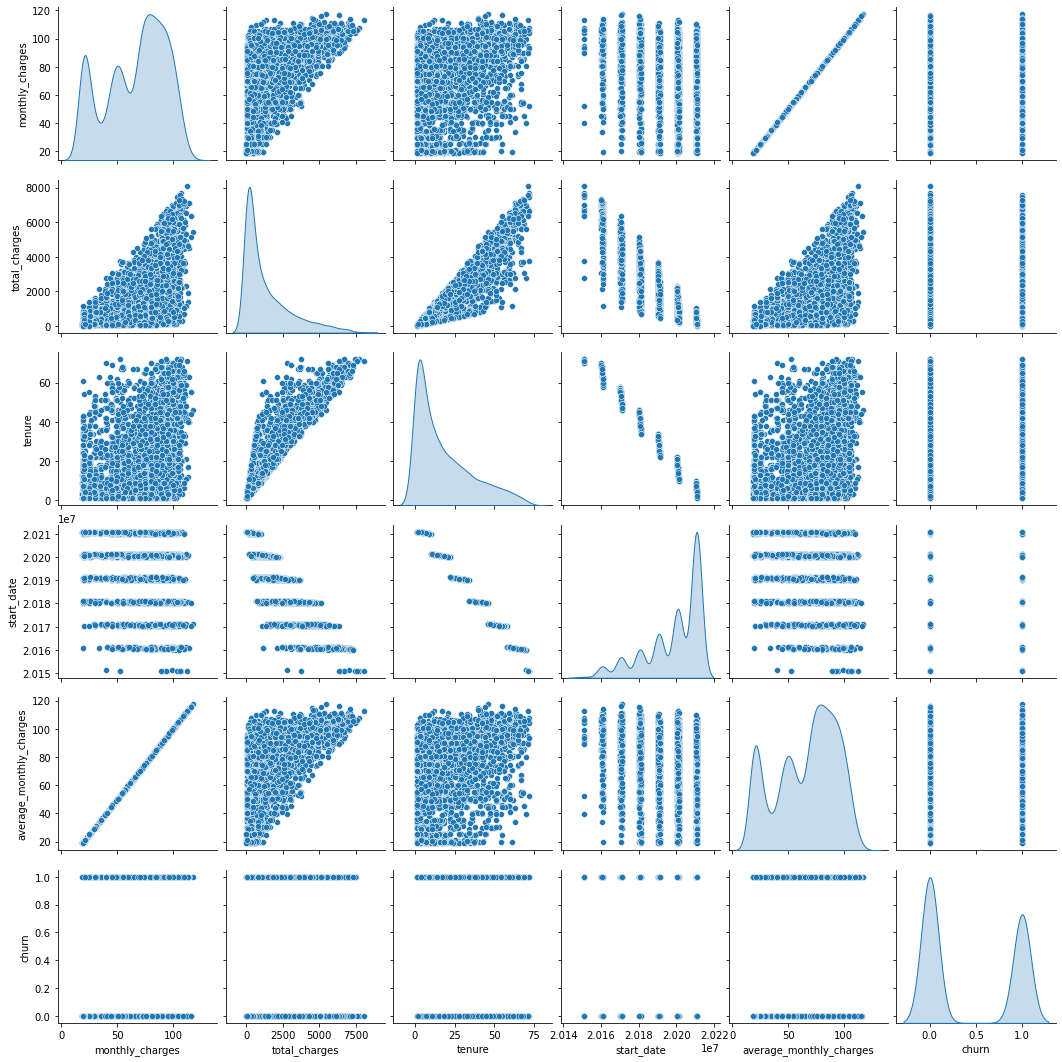

In [49]:
#Separating columns to be visualized
out_cols = list(set(data.nunique()[data.nunique()<6].keys().tolist()
                    + data.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in data.columns if x not in out_cols] + ['churn']

sns.pairplot(data[viz_cols], diag_kind="kde")
plt.show()